<a href="https://colab.research.google.com/github/ehsanem/Tensorflow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Types of classification problems
There are 3 types:

1. **Binary**: Two classes
2. **Multiclass**: More than 2 classes
3. **Multilable**: A single class has multiple lables




#Modelling process
The modelling process is as same as usual problems but loss function and metrics are different and depends on the problem type.

#Modelling steps

In [2]:
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Generate sample data

In [3]:
X, y = make_circles(1000, noise=0.03, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

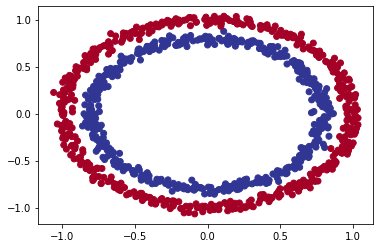

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

##Create decision boundary function

In [3]:
# create a function to plot decision boundary
def decision_boundary(model, X, y):
  #create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # OUPTPUT: xx and yy list with shape 100 elements and each element 100 values: 100x100
  
  #flatten  xx and yy list
  x_in = np.c_[xx.ravel(), yy.ravel()]

  #make pediction
  y_pred = model.predict(x_in)
  
  #finding maximum values in each element of y array to plot decision surface
  
  # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
  if model.output_shape[-1] > 1: 
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  #plotting
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

##Create model 00

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=100, verbose = 0)

###Plot model 00 performance
A model with two layers:
1. **Layer 1**: 10 units with Relu activation
2.  **Layer 2**: 1 units with Relu activation

doing binary classifcation...


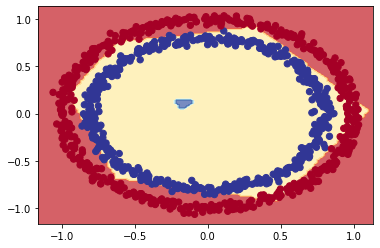

In [5]:
decision_boundary(model, X, y)

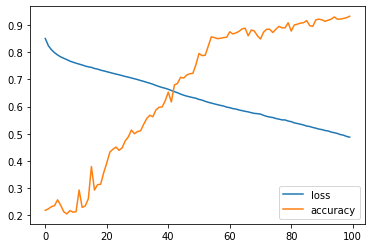

In [20]:
pd.DataFrame(history.history).plot()

##Create model 01

In [16]:
tf.random.set_seed(42)
model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_01.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

history_01= model_01.fit(X_train, y_train, epochs=100, verbose = 1)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.4987
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5053
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5213
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6767 - accuracy: 0.5320
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.5293
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.5413
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5507
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.5680
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.5947
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6040
Epoch 11/

###Plot model 01 performance
A model with two layers:
1. **Layer 1**: 10 units with Relu activation
2. **Layer 2**: 10 units with Relu activation
3. **Layer 3**: 1 units with sigmoid activation

doing binary classifcation...


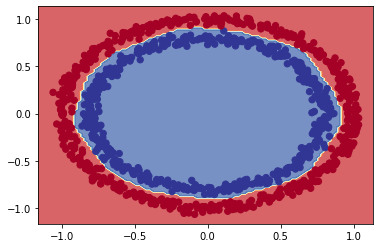

In [17]:
decision_boundary(model_01, X, y)

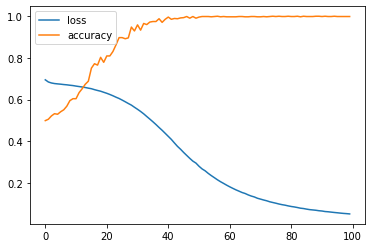

In [19]:
pd.DataFrame(history_01.history).plot()

#Find optimum learning rate
callbacks are a set of controllers during training:

Types of callbacks:
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

We change LR based on a function (e.g. change LR based on exponential function) and plot LR and loss for all epochs

In [4]:
tf.random.set_seed(42)
model_02 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_02.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_02= model_02.fit(X_train, y_train, epochs=100,callbacks=[lr_scheduler], verbose = 1)



Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7155 - accuracy: 0.4813 - lr: 1.0000e-04
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7130 - accuracy: 0.4813 - lr: 1.1220e-04
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.4813 - lr: 1.2589e-04
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.4813 - lr: 1.4125e-04
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4813 - lr: 1.5849e-04
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.4813 - lr: 1.7783e-04
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4813 - lr: 1.9953e-04
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4813 - lr: 2.2387e-04
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss:

##Plot learning rate, loss, accuracy vs. epoch

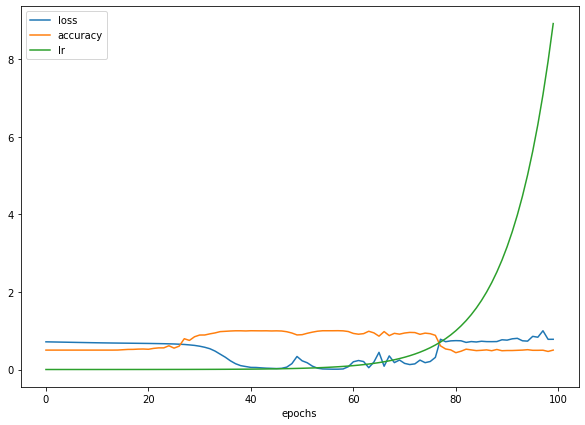

In [10]:
pd.DataFrame(history_02.history).plot(figsize=(10,7),xlabel='epochs')

In [ ]:
#closer look at loss and LR

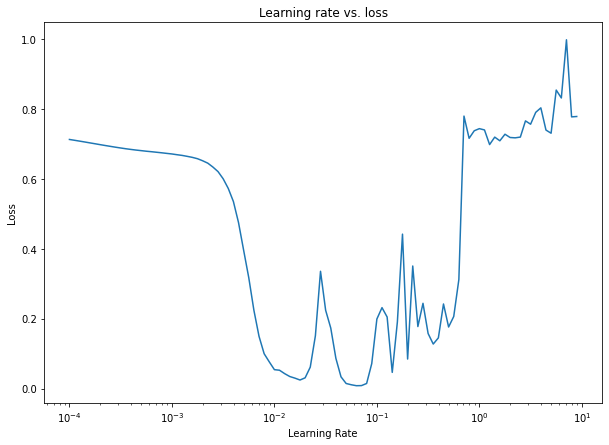

In [13]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_02.history["loss"]) #log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

So for our model, based on the following rule of thumb, the optimum LR is around 0.01

##LR rule of thumb
Usually LR is equal to 1 times smaller than the lowest point of the LR.

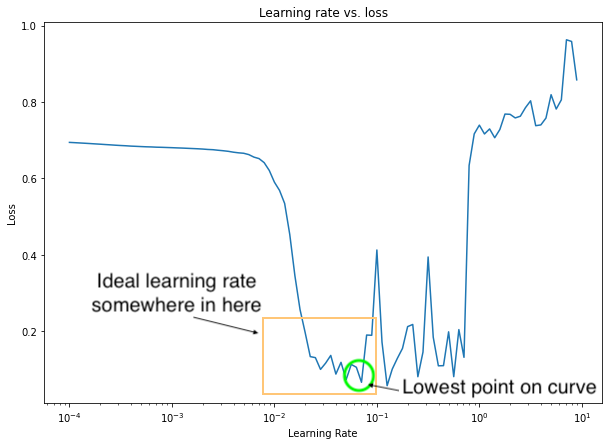

#Common classification metrics

In [10]:

pd.DataFrame({'Metric name':['Accuracy','Precision', 'Recall', 'F1-score', 'Confusion matrix', 'Classification report'],
              'Defintion': ['The percentage of correct predictions',
                            'Proportion of true positives over total number of samples.',
                            'Proportion of true positives over total number of true positives and false negatives',
                            'Combines precision and recall into one metric. 1 is best, 0 is worst.',
                            'x',
                            'x']}).style.hide_index()


Metric name,Defintion
Accuracy,The percentage of correct predictions
Precision,Proportion of true positives over total number of samples.
Recall,Proportion of true positives over total number of true positives and false negatives
F1-score,"Combines precision and recall into one metric. 1 is best, 0 is worst."
Confusion matrix,x
Classification report,x


#Confusion Matrix
A matrix that compare y_test vs. y_pred labels and show them in a matrix.

True positive: when y_predicted and y_test both are 1
True Negative: when y_predicted and y_test both are 0
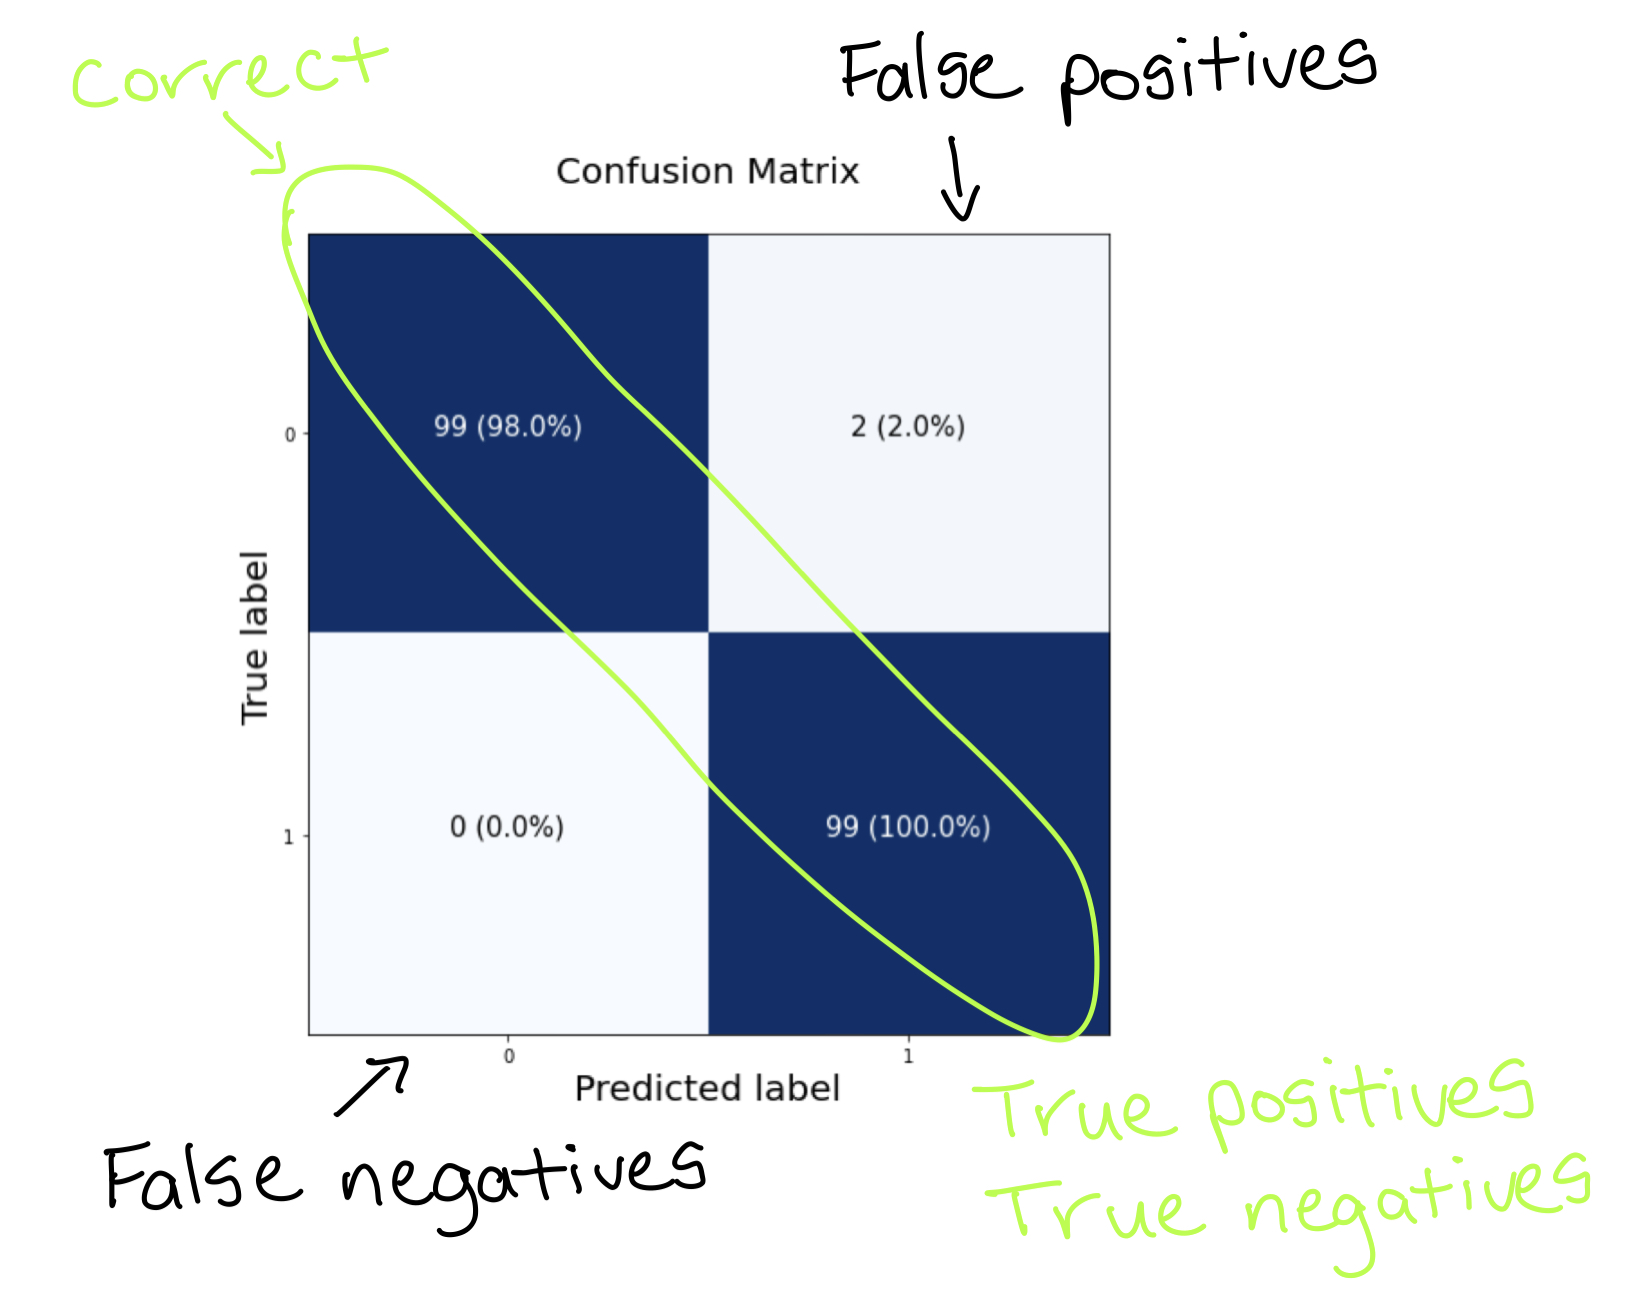

Predicted values are in float type bacause the show the probilility. They need to convert into binary format.


```
tf.round(...)
```



In [6]:
model_02.predict(X_test)

array([[0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],
       [0.8989868],


In [7]:
tf.round(model_02.predict(X_test))

<tf.Tensor: shape=(250, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
 

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tf.round(model_02.predict(X_test)))

array([[  0, 139],
       [  0, 111]])

#Multiclass Classification
It is similar to binary classification but needs some changes:
1. **Loss function**:
   
   if labels are One-Hot Encoder:
   
   CategoricalCrossentropy

   if labels are Numerical Encoder:
   SparseCategoricalCrossentropy
2. **Last layer activation function**:

  softmax

In [4]:
model_03 = tf.keras.Sequential([
                                tf.keras.layers.Dense(10, activation='relu'),
                                tf.keras.layers.Dense(20, activation='relu'),
                                tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_03.compile(optimizer='Adam',
                 loss='CategoricalCrossentropy',
                 metrics='Accuracy')

#Image Multiclass Classification
It needs extra steps in addition to previous steps:

1. Add input layer on top of hidden layers to specify input shape
2. Flatten input and convert it to a vector

##MNIST Dataset Example
MNIST data are devided into two part:
1. 60,000 training dataset
2. 10,000 test dataset

In [77]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [78]:
print(train_data[20])
print(train_labels[20])
print(type(train_labels[20]))
print(train_data.shape, train_labels.shape)

[[  0   0   0   0   0   1   0   0   0  65  99   0   0   0   0   0   0   0
  106  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  17 190 206 202 145 148 146 148 166 165 189
  212 210 202   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 229 193 189 197 169 182 109 165 156 202
  198 196 233  96   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2 199 198 213 193 201 207 196 172 211 206 207
  200 202 208 217   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 205 200 207 190 192 210 210 208 212 208 197
  201 210 206 205  83   0   0   0   0   0]
 [  0   0   0   0   0   2 196 220 200 200 190 193 199 222 222 225 199 198
  210 212 218 227 189   0   0   0   0   0]
 [  0   0   0   0   0   0   0 162 215 199 192 196 195 204 221 200 195 205
  208 218 235 170   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 172 240 192 204 203 206 203 199 206 215
  211 232 114   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0  32 235 200 206 208 205 20

##Visualize

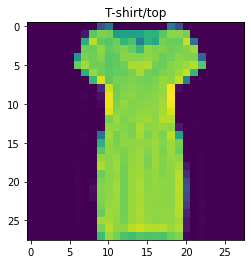

In [20]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.title(class_names[train_labels[17]])
plt.imshow(train_data[20])


##Model Building
Note that the **validation_data** is added to fit method

In [79]:
from sklearn import metrics
model_04 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation="softmax")
])

model_04.compile(optimizer='Adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics='Accuracy')



In [80]:
model_04.fit(train_data,
             train_labels,
             epochs=10,
             validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2699 - Accuracy: 0.1479 - val_loss: 2.0916 - val_Accuracy: 0.1779
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8684 - Accuracy: 0.2282 - val_loss: 1.7363 - val_Accuracy: 0.2420
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7033 - Accuracy: 0.2632 - val_loss: 1.6435 - val_Accuracy: 0.3015
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6082 - Accuracy: 0.3089 - val_loss: 1.5711 - val_Accuracy: 0.3235
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5660 - Accuracy: 0.3188 - val_loss: 1.5481 - val_Accuracy: 0.3148
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5446 - Accuracy: 0.3218 - val_loss: 1.5315 - val_Accuracy: 0.3390
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5314 - Accuracy: 0.3202 - val_loss: 1.5233 - val_Accuracy:

☝ Don't forget to normalize & standardize data